In [60]:
import json
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
from agent.bc_agent import BCAgent
from torchsummary import summary
import numpy as np

In [51]:
agent = BCAgent(class_weights=[0.25, 0.25, 0.25, 0.25])
agent.load("models/bc_agent_0.pt")
summary(agent.model, (1, 72, 72))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 17, 17]             416
              ReLU-2           [-1, 16, 17, 17]               0
           Dropout-3           [-1, 16, 17, 17]               0
            Conv2d-4             [-1, 32, 8, 8]           4,640
              ReLU-5             [-1, 32, 8, 8]               0
           Dropout-6             [-1, 32, 8, 8]               0
           Flatten-7                 [-1, 2048]               0
            Linear-8                  [-1, 128]         262,272
              ReLU-9                  [-1, 128]               0
          Dropout-10                  [-1, 128]               0
           Linear-11                    [-1, 4]             516
Total params: 267,844
Trainable params: 267,844
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.02
Forward/

In [104]:
def read_summary(path):
    bc_train = tf.compat.v1.train.summary_iterator(path)

    bc_train_loss, bc_train_acc, bc_valid_loss, bc_valid_acc = [], [], [], []
    for i, event in enumerate(bc_train):
        if i < 2:
            continue
        for value in event.summary.value:
                if value.tag == 'train-loss':
                    bc_train_loss.append(value.simple_value)
                if value.tag == 'train-acc':
                    bc_train_acc.append(value.simple_value)
                if value.tag == 'valid-loss':
                    bc_valid_loss.append(value.simple_value)
                if value.tag == 'valid-acc':
                    bc_valid_acc.append(value.simple_value)
        
    return bc_train_loss, bc_train_acc, bc_valid_loss, bc_valid_acc

bc_0_path = 'tensorboard/imitation_learning_0-20220507-133646/events.out.tfevents.1651923406.Jakes-MacBook-Pro.local.96713.0'
bc_1_path = 'tensorboard/imitation_learning_1-20220507-134634/events.out.tfevents.1651923994.Jakes-MacBook-Pro.local.97206.0'
bc_3_path = 'tensorboard/imitation_learning_3-20220507-135530/events.out.tfevents.1651924530.Jakes-MacBook-Pro.local.97964.0'
bc_5_path = 'tensorboard/imitation_learning_5-0220507-141618/events.out.tfevents.1651925778.Jakes-MacBook-Pro.local.99556.0'

bc_0_train_loss, bc_0_train_acc, bc_0_valid_loss, bc_0_valid_acc = read_summary(bc_0_path)
bc_1_train_loss, bc_1_train_acc, bc_1_valid_loss, bc_1_valid_acc = read_summary(bc_1_path)
bc_3_train_loss, bc_3_train_acc, bc_3_valid_loss, bc_3_valid_acc = read_summary(bc_3_path)
bc_5_train_loss, bc_5_train_acc, bc_5_valid_loss, bc_5_valid_acc = read_summary(bc_5_path)

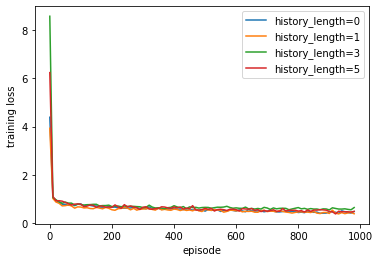

In [120]:
episodes = np.arange(start=0, stop=990, step=10)
fig = plt.subplot()
fig.plot(episodes, bc_0_train_loss, label='history_length=0')
fig.plot(episodes, bc_1_train_loss, label='history_length=1')
fig.plot(episodes, bc_3_train_loss, label='history_length=3')
fig.plot(episodes, bc_5_train_loss, label='history_length=5')
fig.legend()
plt.xlabel('episode')
plt.ylabel('training loss')
plt.show()

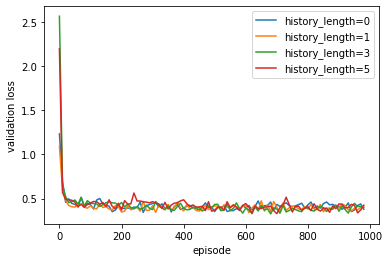

In [123]:
episodes = np.arange(start=0, stop=990, step=10)
fig = plt.subplot()
fig.plot(episodes, bc_0_valid_loss[1:], label='history_length=0')
fig.plot(episodes, bc_1_valid_loss[1:], label='history_length=1')
fig.plot(episodes, bc_3_valid_loss[1:], label='history_length=3')
fig.plot(episodes, bc_5_valid_loss[1:], label='history_length=5')
fig.legend()
plt.xlabel('episode')
plt.ylabel('validation loss')
plt.show()

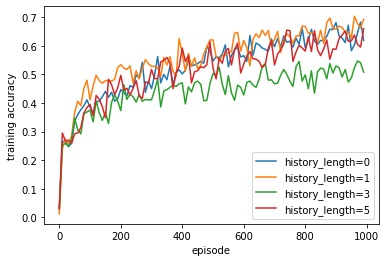

In [117]:
episodes = np.arange(start=0, stop=1000, step=10)
fig = plt.subplot()
fig.plot(episodes, bc_0_train_acc, label='history_length=0')
fig.plot(episodes, bc_1_train_acc, label='history_length=1')
fig.plot(episodes, bc_3_train_acc, label='history_length=3')
fig.plot(episodes, bc_5_train_acc, label='history_length=5')
fig.legend()
plt.xlabel('episode')
plt.ylabel('training accuracy')
plt.show()

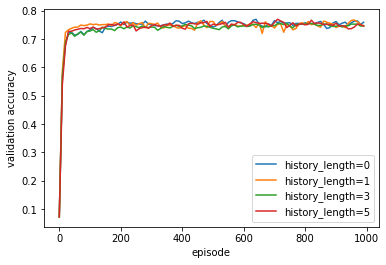

In [124]:
episodes = np.arange(start=0, stop=1000, step=10)
fig = plt.subplot()
fig.plot(episodes, bc_0_valid_acc, label='history_length=0')
fig.plot(episodes, bc_1_valid_acc, label='history_length=1')
fig.plot(episodes, bc_3_valid_acc, label='history_length=3')
fig.plot(episodes, bc_5_valid_acc, label='history_length=5')
fig.legend()
plt.xlabel('episode')
plt.ylabel('validation accuracy')
plt.show()

In [126]:
bc_test_file = open('results/results_bc_agent-20220507-140447.json')
bc_test_rewards = json.load(bc_test_file)['episode_rewards']

expert_test_file = open('results/results_manually-20220507-143924.json')
expert_test_rewards = json.load(expert_test_file)['episode_rewards']

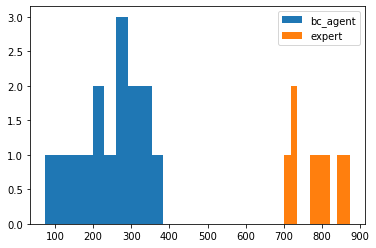

In [135]:
fig = plt.subplot()
fig.hist(bc_test_rewards, label='bc_agent')
fig.hist(expert_test_rewards, label='expert')
fig.legend()
plt.show()